<a name="TF-KS"></a>
## **Hyperparameter Selection**

Table of contents:
- [Learning Curve](#Loss-plot)
- [Hyperparameter Tuning](#Tuning)

In [5]:
#! pip install scikeras[tensorflow]

In [6]:
#import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.optimizers import Adam

#from tensorflow.keras import initializers

from sklearn.metrics import accuracy_score#confusion_matrix,
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
#from keras.models import Sequential
#from keras.layers import Dense
from scikeras.wrappers import KerasClassifier,KerasRegressor # for this line work first execute  pip install scikeras[tensorflow]


<a name="Dataset"></a>
## **Dataset**


In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/auto-mpg.csv", na_values='?', usecols=["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model year"])
data = data.dropna()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [9]:
data.shape

(392, 7)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('MPG', axis=1), data['MPG'], test_size=0.3, random_state=42)

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [12]:
#Z-score Normalizing
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_val = preprocessing.scale(X_val)
X_test = preprocessing.scale(X_test)

<a name="Loss-plot"></a>
## **Learning Curve**


In [13]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(4, activation = 'relu')) # kernel_initializer= initializers.glorot_uniform(seed=42)
model.add(Dense(2, activation = 'relu')) # 64, kernel_initializer= initializers.glorot_uniform(seed=42)
model.add(Dense(1, activation='relu'))

In [14]:
model.compile(loss="mean_absolute_error")

In [15]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
9/9 [==============================] - 6s 24ms/step - loss: 23.2806 - val_loss: 21.6768
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 23.2117 - val_loss: 21.6139
Epoch 3/20
9/9 [==============================] - 0s 6ms/step - loss: 23.1508 - val_loss: 21.5539
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 23.0896 - val_loss: 21.4919
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 23.0271 - val_loss: 21.4307
Epoch 6/20
9/9 [==============================] - 0s 9ms/step - loss: 22.9633 - val_loss: 21.3655
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 22.8954 - val_loss: 21.2951
Epoch 8/20
9/9 [==============================] - 0s 6ms/step - loss: 22.8250 - val_loss: 21.2254
Epoch 9/20
9/9 [==============================] - 0s 6ms/step - loss: 22.7527 - val_loss: 21.1519
Epoch 10/20
9/9 [==============================] - 0s 6ms/step - loss: 22.6771 - val_loss: 21.0743
Epoch 11/20
9/9 [=

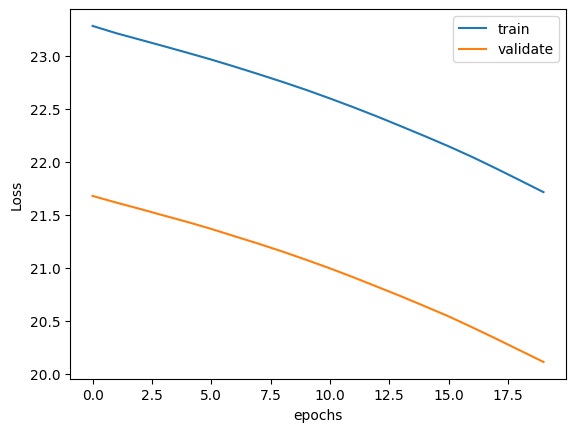

In [16]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
# Accuracy (Root Mean Squared Error)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2/2 [==============================] - 0s 3ms/step


23.6071099885402

<a name="Tuning"></a>
<h1> Hyperparameter Tuning </h1>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/W3WZC8d/tune.png" alt="tune" border="0"></a>

In [18]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate,hidden_unit1,hidden_unit2):
  # create model
  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape=X_train.shape[1]))
  model.add(Dense(hidden_unit1, activation = 'relu'))
  model.add(Dense(hidden_unit1, activation = 'relu'))
  model.add(Dense(1, activation='relu'))

	# Compile model
  optimizer = Adam(learning_rate=learn_rate)
  model.compile(loss='mean_absolute_error', optimizer= optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

In [19]:
# define the grid search parameters
hidden_unit1=[4,32]
hidden_unit2=[2,16]
learn_rate = [0.001, 0.01]
hyperparameters = dict(learn_rate = learn_rate,
                       hidden_unit1=hidden_unit1,
                       hidden_unit2=hidden_unit2)

In [20]:
hyperparameters

{'learn_rate': [0.001, 0.01], 'hidden_unit1': [4, 32], 'hidden_unit2': [2, 16]}

In [21]:
# Wrap model so it can be used by scikit-learn
neural_network = KerasRegressor(model=create_model,hidden_unit1=hidden_unit1,hidden_unit2=hidden_unit2,learn_rate=learn_rate)

In [22]:
# Conduct Grid Search

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, n_jobs=-1, cv=5)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

9/9 [==============================] - 1s 5ms/step - loss: 22.6708 - mean_squared_error: 588.0558


In [23]:
neural_network.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_unit1', 'hidden_unit2', 'learn_rate'])

In [24]:
# Find best model's hyperparameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-8.724654 (1.551152) with: {'hidden_unit1': 4, 'hidden_unit2': 2, 'learn_rate': 0.001}
-8.677710 (1.622190) with: {'hidden_unit1': 4, 'hidden_unit2': 2, 'learn_rate': 0.01}
-9.109790 (1.371602) with: {'hidden_unit1': 4, 'hidden_unit2': 16, 'learn_rate': 0.001}
-8.994298 (1.530739) with: {'hidden_unit1': 4, 'hidden_unit2': 16, 'learn_rate': 0.01}
-8.978090 (1.425764) with: {'hidden_unit1': 32, 'hidden_unit2': 2, 'learn_rate': 0.001}
-6.799330 (1.062494) with: {'hidden_unit1': 32, 'hidden_unit2': 2, 'learn_rate': 0.01}
-8.768886 (1.425942) with: {'hidden_unit1': 32, 'hidden_unit2': 16, 'learn_rate': 0.001}
-6.661263 (1.563718) with: {'hidden_unit1': 32, 'hidden_unit2': 16, 'learn_rate': 0.01}

Best: -6.661263 using {'hidden_unit1': 32, 'hidden_unit2': 16, 'learn_rate': 0.01}


<a name="Final"></a>
## **Create final model**

In [25]:
# create model
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(grid_result.best_params_['hidden_unit1'], activation = 'relu'))
model.add(Dense(grid_result.best_params_['hidden_unit2'], activation = 'relu'))
model.add(Dense(1, activation='relu'))

# Compile model
optimizer = Adam(learning_rate=grid_result.best_params_['learn_rate'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train, y_train, epochs = 100, verbose = 1, validation_data=(X_val,y_val)) # batch_size = grid_result.best_params_['batch_size']

Epoch 1/100
9/9 [==============================] - 2s 30ms/step - loss: 591.9542 - mean_squared_error: 591.9542 - val_loss: 506.4740 - val_mean_squared_error: 506.4740
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 577.9414 - mean_squared_error: 577.9414 - val_loss: 493.3227 - val_mean_squared_error: 493.3227
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 563.0071 - mean_squared_error: 563.0071 - val_loss: 478.8061 - val_mean_squared_error: 478.8061
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 546.3445 - mean_squared_error: 546.3445 - val_loss: 462.4266 - val_mean_squared_error: 462.4266
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 527.0045 - mean_squared_error: 527.0045 - val_loss: 443.6186 - val_mean_squared_error: 443.6186
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 505.8406 - mean_squared_error: 505.8406 - val_loss: 421.5705 - val_mean_squared_error: 421.

In [26]:
# Accuracy (Root Mean Squared Error)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2/2 [==============================] - 0s 5ms/step


3.053339230916917